# **취업 | 로지스틱 회귀분석**

라이브러리 설치

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model

## 1. 데이터 불러오기

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment.csv')
df  ## 페이크 데이터입니다.

,toeic,gpa,employment
0,135,0.051535,0
1,935,0.355496,0
2,485,2.228435,0
3,65,1.179701,0
4,445,3.962356,1
...,...,...,...
495,280,4.288465,1
496,310,2.601212,1
497,225,0.042323,0
498,320,1.041416,0


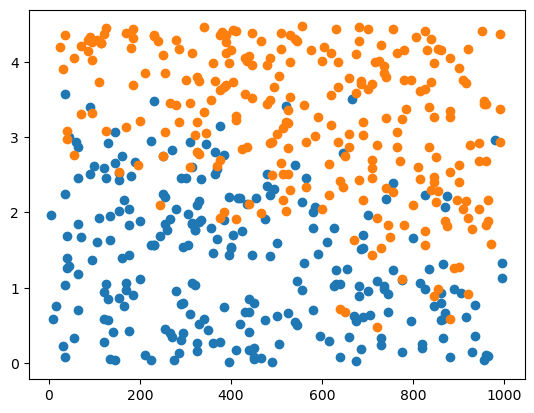

In [5]:
plt.plot(df.toeic[df.employment == 0], df.gpa[df.employment == 0], 'o')
plt.plot(df.toeic[df.employment == 1], df.gpa[df.employment == 1], 'o')
plt.show()

그래서, 하고싶은 것은?

> 토익 성적과 학점(연속형 자료)와 취업 여부(범주형 자료)의 관계를 구하고 싶다.

## 2. 분석

### **A. 데이터 정리**

In [7]:
X = pd.get_dummies(df[['toeic', 'gpa']])  ## 둘다 연속형이라 아무 일도 일어나지 않겠지만... 습관적으로 해라
y = df[['employment']]

### **B. Predictor(★★★)**
\- 여기서 중요!

* y가 연속형이 아니라 범주형으로 이루어진 경우는 ```sklearn.linear_model.LogisticRegression()```을 이용할 것.

In [8]:
predictr = sklearn.linear_model.LogisticRegression()
predictr

LogisticRegression()

### **C. 학습**

In [9]:
predictr.fit(X, y)

C:\Users\hollyriver\anaconda3\envs\ag\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

오류는 일단 무시해도 되나...?

### **D. 예측**

In [11]:
df.assign(employment_hat = predictr.predict(X))

,toeic,gpa,employment,employment_hat
0,135,0.051535,0,0
1,935,0.355496,0,0
2,485,2.228435,0,0
3,65,1.179701,0,0
4,445,3.962356,1,1
...,...,...,...,...
495,280,4.288465,1,1
496,310,2.601212,1,0
497,225,0.042323,0,0
498,320,1.041416,0,0


나름 잘 맞춘 것 같다.

### **E. 평가**

In [12]:
predictr.score(X, y)

0.882

In [14]:
(predictr.predict(X) == df.employment).mean()

0.882

\- 정확도를 산출해준다. 나름 잘 맞는 것 같다?

> 그럼 시각화를 해보자.

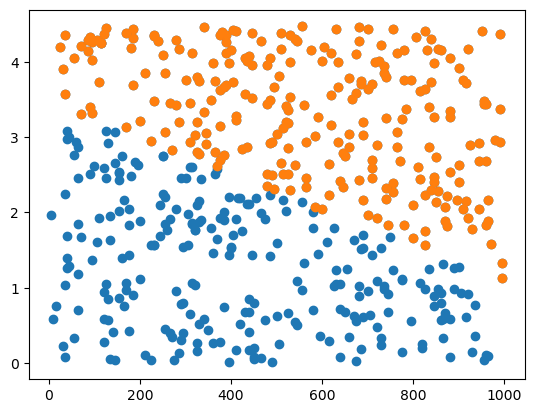

In [22]:
df_filtered = df[predictr.predict(X) == 1]  ## 예상치

plt.plot(df.toeic, df.gpa, 'o')
plt.plot(df_filtered.toeic, df_filtered.gpa, 'o')

plt.show()

<Figure size 640x480 with 0 Axes>

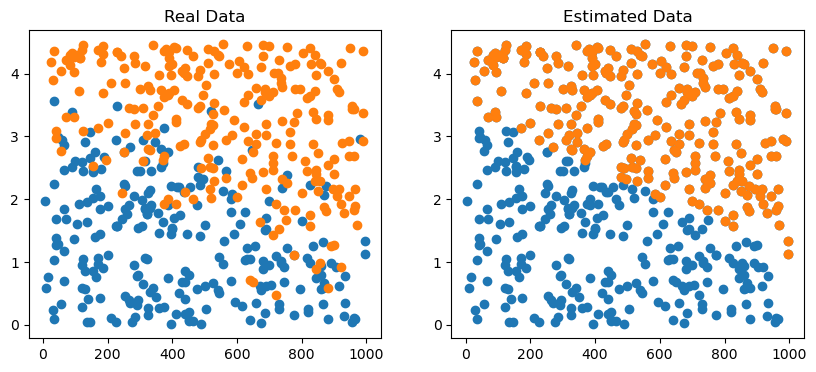

In [59]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))

ax1.plot(df.toeic[df.employment == 0], df.gpa[df.employment == 0], 'o')
ax1.plot(df.toeic[df.employment == 1], df.gpa[df.employment == 1], 'o')
ax1.set_title('Real Data')

df_filtered = df[predictr.predict(X) == 1]  ## 예상치

ax2.plot(df.toeic, df.gpa, 'o')
ax2.plot(df_filtered.toeic, df_filtered.gpa, 'o')
ax2.set_title('Estimated Data')

plt.show()

* 이정도면 합리적임